In [35]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [36]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [37]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df["target"] = iris.target
df["flower_names"] = df.target.apply(lambda x: iris.feature_names[x])
df = df.drop(columns = ["sepal length (cm)", "sepal width (cm)"], axis = 1)
df

,petal length (cm),petal width (cm),target,flower_names
0,1.4,0.2,0,sepal length (cm)
1,1.4,0.2,0,sepal length (cm)
2,1.3,0.2,0,sepal length (cm)
3,1.5,0.2,0,sepal length (cm)
4,1.4,0.2,0,sepal length (cm)
...,...,...,...,...
145,5.2,2.3,2,petal length (cm)
146,5.0,1.9,2,petal length (cm)
147,5.2,2.0,2,petal length (cm)
148,5.4,2.3,2,petal length (cm)


In [45]:
scaler = MinMaxScaler()
df["petal width (cm)"] = scaler.fit_transform(df[["petal width (cm)"]])
df["petal length (cm)"] = scaler.fit_transform(df[["petal length (cm)"]])

kf = KMeans(n_clusters = 3)
y_pred = kf.fit_predict(df[["petal length (cm)", "petal width (cm)"]])
df["clusters"] = y_pred

df["clusters"].unique()

df0 = df[df["clusters"] == 0]
df1 = df[df["clusters"] == 1]
df2 = df[df["clusters"] == 2]

df

C:\Users\nyasa\Downloads\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nyasa\Downloads\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,petal length (cm),petal width (cm),target,flower_names,clusters
0,0.067797,0.041667,0,sepal length (cm),1
1,0.067797,0.041667,0,sepal length (cm),1
2,0.050847,0.041667,0,sepal length (cm),1
3,0.084746,0.041667,0,sepal length (cm),1
4,0.067797,0.041667,0,sepal length (cm),1
...,...,...,...,...,...
145,0.711864,0.916667,2,petal length (cm),0
146,0.677966,0.750000,2,petal length (cm),0
147,0.711864,0.791667,2,petal length (cm),0
148,0.745763,0.916667,2,petal length (cm),0


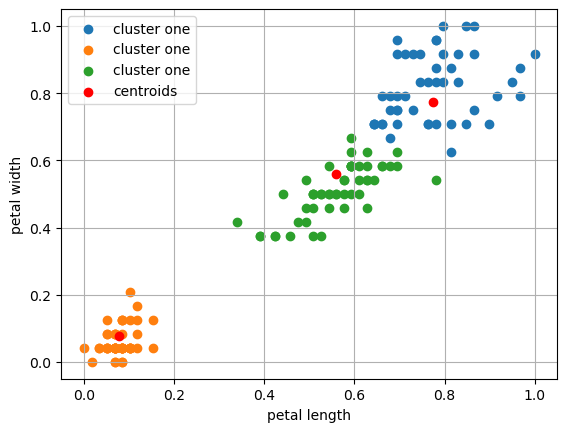

In [46]:
%matplotlib inline

plt.scatter(df0["petal length (cm)"], df0["petal width (cm)"], label = "cluster one")
plt.scatter(df1["petal length (cm)"], df1["petal width (cm)"], label = "cluster one")
plt.scatter(df2["petal length (cm)"], df2["petal width (cm)"], label = "cluster one")

plt.scatter(kf.cluster_centers_[:, 0], kf.cluster_centers_[:, 0], label = "centroids", color = "red", marker="+")

plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()
plt.grid()



C:\Users\nyasa\Downloads\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nyasa\Downloads\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nyasa\Downloads\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nyasa\Downloads\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

[5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368,
 5.176463590044368]

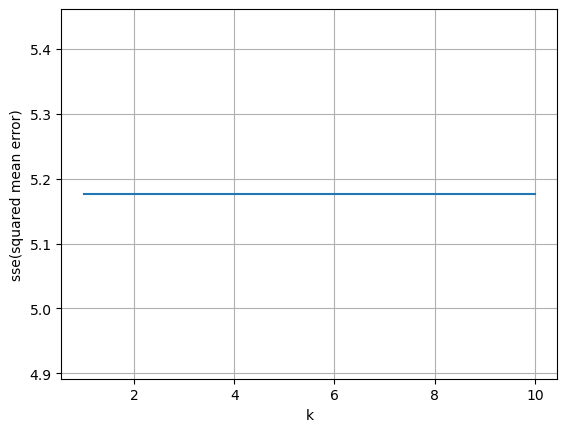

In [50]:
sse = []
k_range = range(1, 11)
for i in k_range:
    km = KMeans(n_clusters = 2)
    km.fit(df[["petal length (cm)", "petal width (cm)"]])
    sse.append(km.inertia_)

plt.plot(k_range, sse)
plt.xlabel("k")
plt.ylabel("sse(squared mean error)") 

sse